# Mapping Data

This notebook exists just to make a few quick and dirty maps of our data to ensure that we don't have anything too too silly at play.

In [18]:
from matplotlib.axis import Axis
from matplotlib.gridspec import GridSpec
import mapclassify
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

from propensity_helpers import enforce_administrative_boundaries

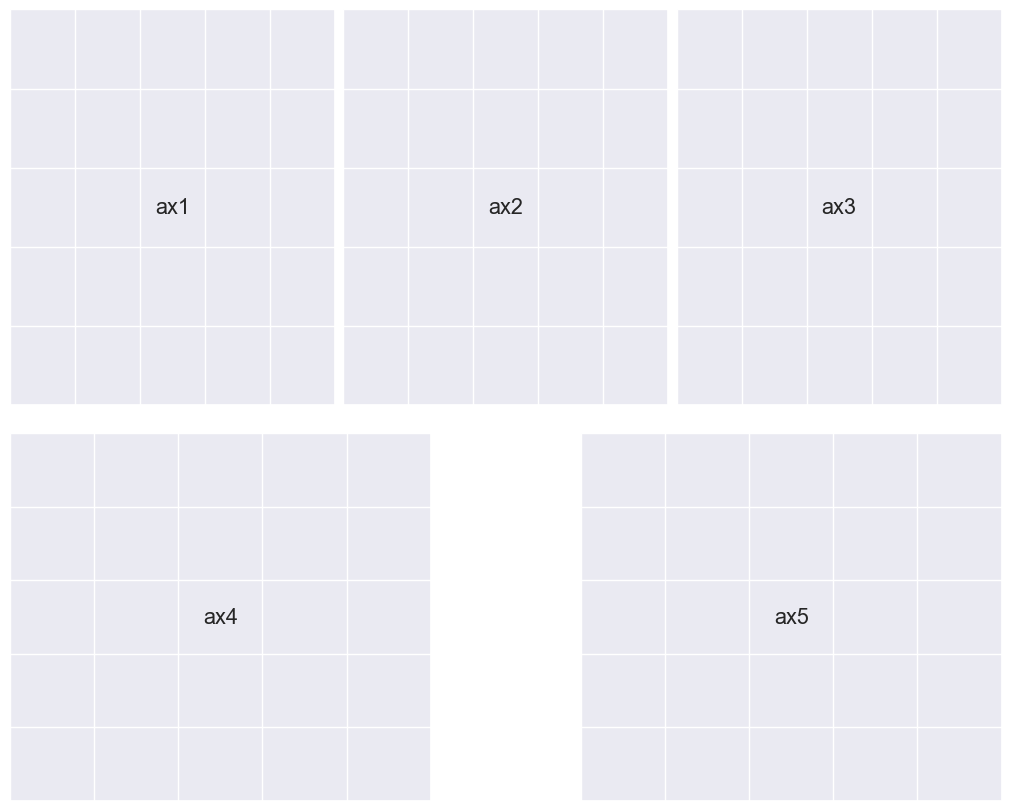

In [2]:
fig = plt.figure(layout='constrained')
gs1 = GridSpec(2, 3, figure=fig)
gs2 = GridSpec(2, 2, figure=fig, hspace=.3, wspace=.3)

axes = [fig.add_subplot(gs1[0, 0]), fig.add_subplot(gs1[0, 1]),
        fig.add_subplot(gs1[0, 2]), fig.add_subplot(gs2[1, 0]),
        fig.add_subplot(gs2[1, 1])]

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

format_axes(fig)

plt.show()

In [62]:
def plot_city(gdf: gpd.GeoDataFrame, state: str, ax: Axis, 
                         variable: str, title: str="", legend: bool=False):
    '''
    Plot one of our cities as a choropleth. The easiest way to do this, 
    amusingly, is to filter by the state.
    '''
    # very simply plot.. for now
    gdf[gdf.STATE == state].plot(variable, ax=ax,
                                 scheme='FisherJenks', edgecolor=(1,1,1,0.2), legend=legend)
    ax.set_axis_off()
    ax.set_title(title, fontdict={'fontsize':32})

def plot_choropleth_grid(gdf: gpd.GeoDataFrame, states: list[str], 
                           variable: str, titles: list[str]):
    '''
    Plot the entire grid of choropleths, with names. Returns the subplot objects.
    '''
    fig = plt.figure(layout='constrained', figsize=(20, 10))
    gs1 = GridSpec(2, 3, figure=fig)
    gs2 = GridSpec(2, 2, figure=fig, hspace=.3, wspace=.3)
    axes = [fig.add_subplot(gs1[0, 0]), fig.add_subplot(gs1[0, 1]),
        fig.add_subplot(gs1[0, 2]), fig.add_subplot(gs2[1, 0]),
        fig.add_subplot(gs2[1, 1])]

    # fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    #axes_but_nice = list(axes[0]) + list(axes[1])
    for i, state in enumerate(states):
        plot_city(gdf, state, axes[i], variable, titles[i])

    return fig, axes

In [20]:
# Split df by cities -- thankfully we can just split on state.
# compare non-black AB to black CD; requires dropping some rows
#mask = df.treatment_.isin(['A', 'B', 'C_black', 'D_black'])
#df_rel = df.copy()[mask].reset_index(drop=True)
data = gpd.read_file('../../data/shapes/census_final.shp')

# Subset down to cities
chicago = data.copy()[data.STATE == 'Illinois']
newyork = data.copy()[data.STATE == 'New York']
philidelphia = data.copy()[data.STATE == 'Pennsylvania']
losangeles = data.copy()[data.STATE == 'California']
detroit = data.copy()[data.STATE == 'Michigan']

# Ensure boundaries are right
chicago = enforce_administrative_boundaries(chicago, "Chicago, Illinois")
newyork = enforce_administrative_boundaries(newyork, "New York, New York")
philidelphia = enforce_administrative_boundaries(philidelphia, "Philadelphia, Pennsylvania")
losangeles = enforce_administrative_boundaries(losangeles, 'Los Angeles, California')
detroit = enforce_administrative_boundaries(detroit, 'Detroit, Michigan')

data = pd.concat([chicago, newyork, philidelphia, losangeles, detroit], axis=0, ignore_index=True)


In [9]:
data.sample(5)

,GISJOIN,YEAR,STATE,STATEA,COUNTY,COUNTYA,TRACTA,AREANAM,whiteP,nonWhtP,...,rfrgOth,refrgNn,rfrgNRp,htCntrl,htNCntr,htNRprt,grade,n_crashes,n_311s,geometry
1162,G3600610004700,1940.0,New York,36,New York,061,0047,STCTY-36061 HEALTH AREA- 0047.00 IN NEW YO...,94.47,5.53,...,37.0,986.0,499.0,7036.0,2933.0,31.0,D,3317.0,644.0,"POLYGON ((1827371.137 578661.677, 1827350.388 ..."
2283,G26016300652,1940.0,Michigan,26,Wayne,163,0652,STCTY-26163 TRACT- 0652 IN DETROIT MI,100.00,0.00,...,6.0,4.0,5.0,1097.0,14.0,0.0,B,211.0,9.0,"POLYGON ((1062826.648 622388.363, 1062725.31 6..."
733,G17003100744,1940.0,Illinois,17,Cook,031,0744,STCTY-17031 TRACT- 0744 IN CHICAGO IL,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,C,427.0,797.0,"POLYGON ((683534.123 512087.46, 683511.472 512..."
1908,G06003700293,1940.0,California,06,Los Angeles,037,0293,STCTY-06037 TRACT- 0293 IN LOS ANGELES CA,95.99,4.01,...,0.0,251.0,0.0,1.0,609.0,1.0,D,410.0,5178.0,"POLYGON ((-2024817.402 -177875.494, -2024785.1..."
2122,G26016300186,1940.0,Michigan,26,Wayne,163,0186,STCTY-26163 TRACT- 0186 IN DETROIT MI,98.73,1.27,...,1.0,17.0,14.0,915.0,10.0,0.0,C,258.0,33.0,"POLYGON ((1052959.139 618305.566, 1052951.396 ..."


### Crash Data Choropleths

3 x 2 Choropleth of all cities crash data

(<Figure size 2000x1000 with 5 Axes>,
 [<Axes: title={'center': 'Chicago'}>,
  <Axes: title={'center': 'Detroit'}>,
  <Axes: title={'center': 'Los Angeles'}>,
  <Axes: title={'center': 'Philidelphia'}>,
  <Axes: title={'center': 'New York City'}>])

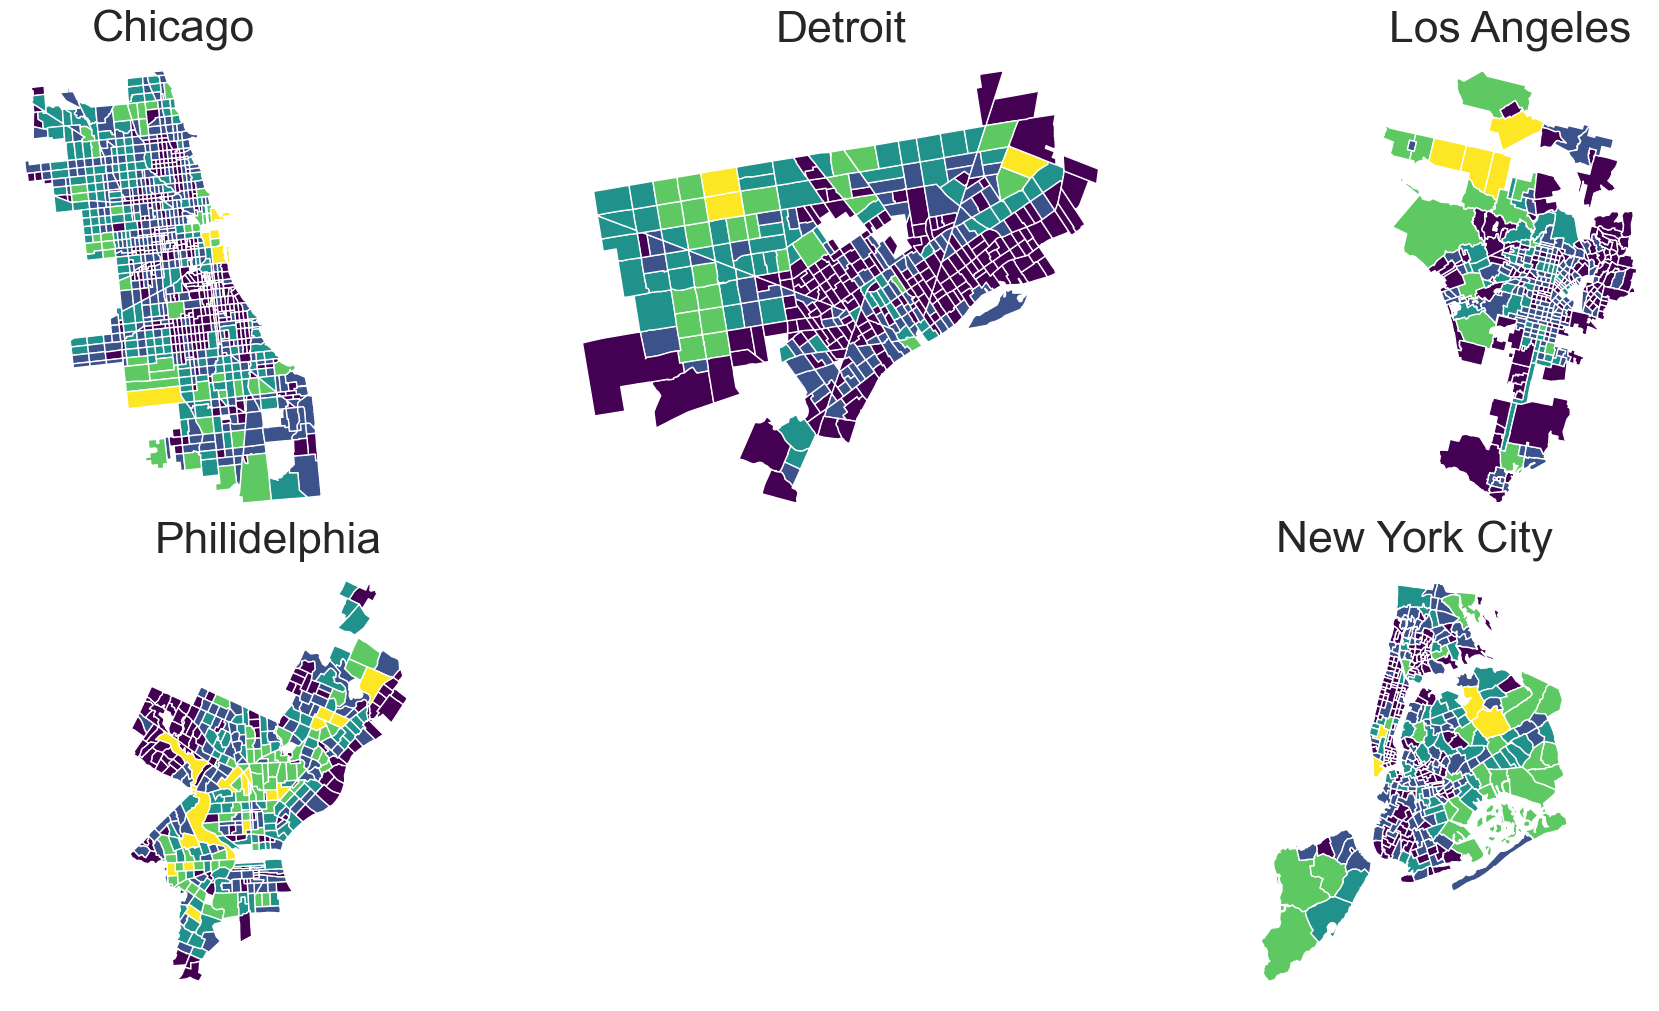

In [10]:
STATES = ["Illinois", "Michigan", "California", "Pennsylvania", "New York"]
TITLES = ["Chicago", "Detroit", "Los Angeles", "Philidelphia", "New York City"]
plot_choropleth_grid(data, STATES, 'n_crashes', TITLES)

### 311 Choropleths

(<Figure size 2000x1000 with 5 Axes>,
 [<Axes: title={'center': 'Chicago'}>,
  <Axes: title={'center': 'Detroit'}>,
  <Axes: title={'center': 'Los Angeles'}>,
  <Axes: title={'center': 'Philidelphia'}>,
  <Axes: title={'center': 'New York City'}>])

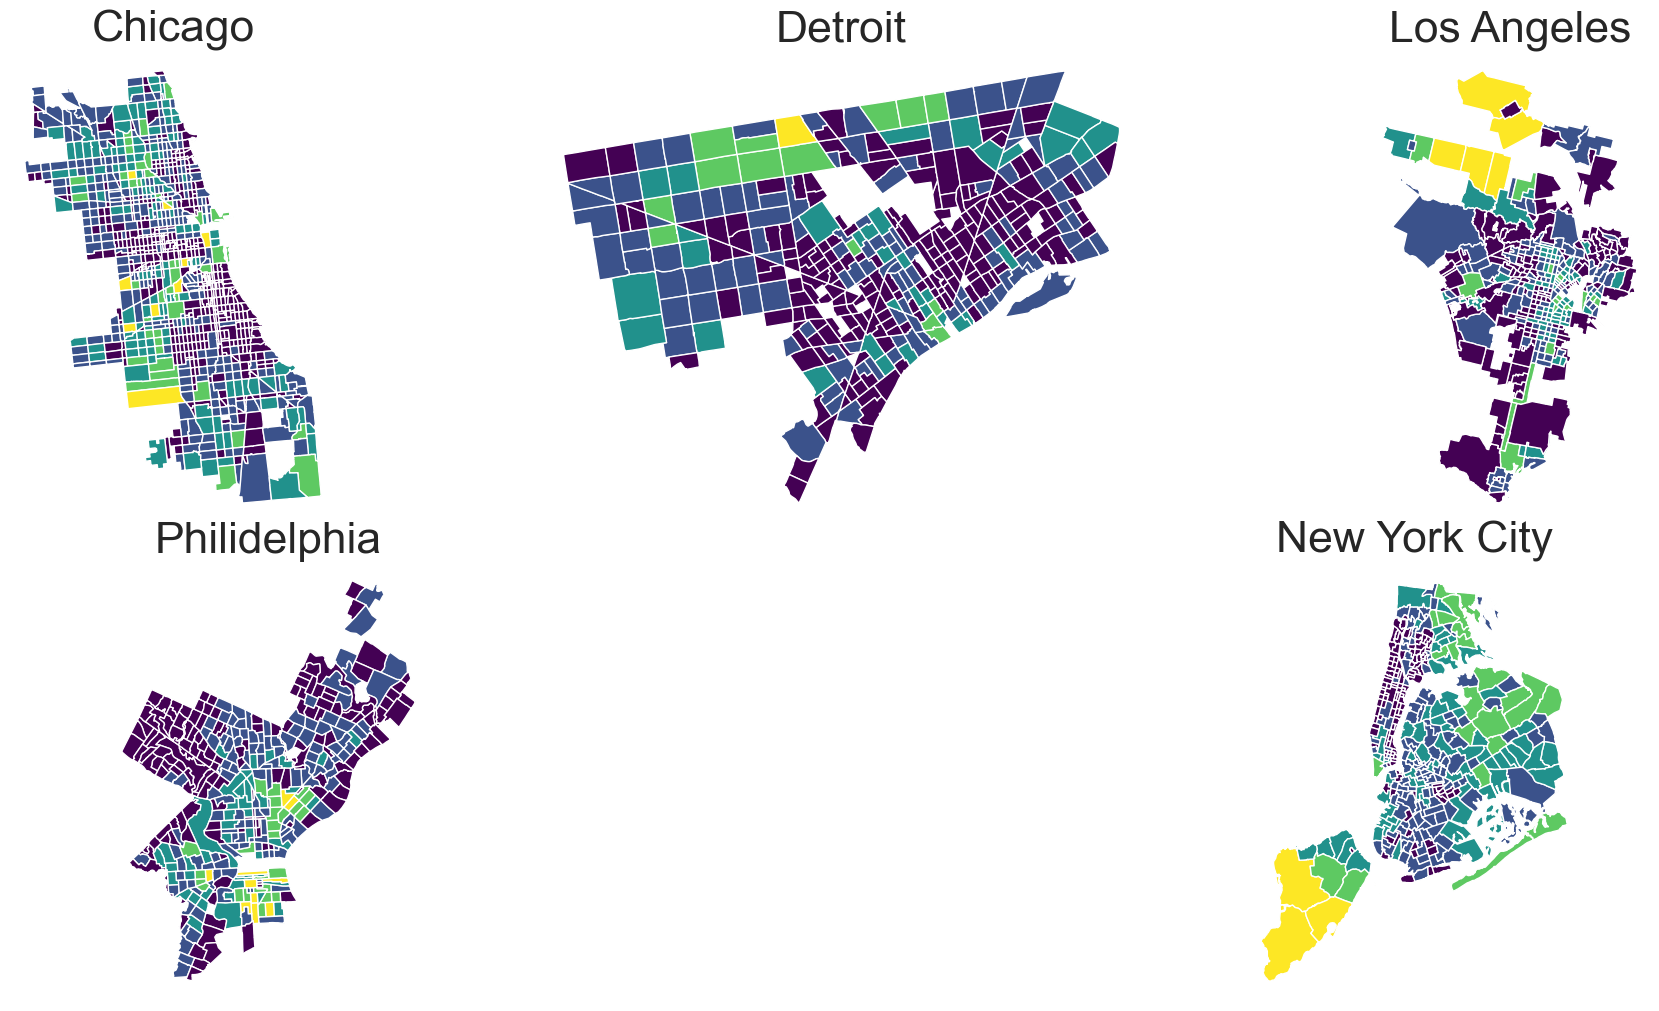

In [11]:
STATES = ["Illinois", "Michigan", "California", "Pennsylvania", "New York"]
TITLES = ["Chicago", "Detroit", "Los Angeles", "Philidelphia", "New York City"]
plot_choropleth_grid(data, STATES, 'n_311s', TITLES)

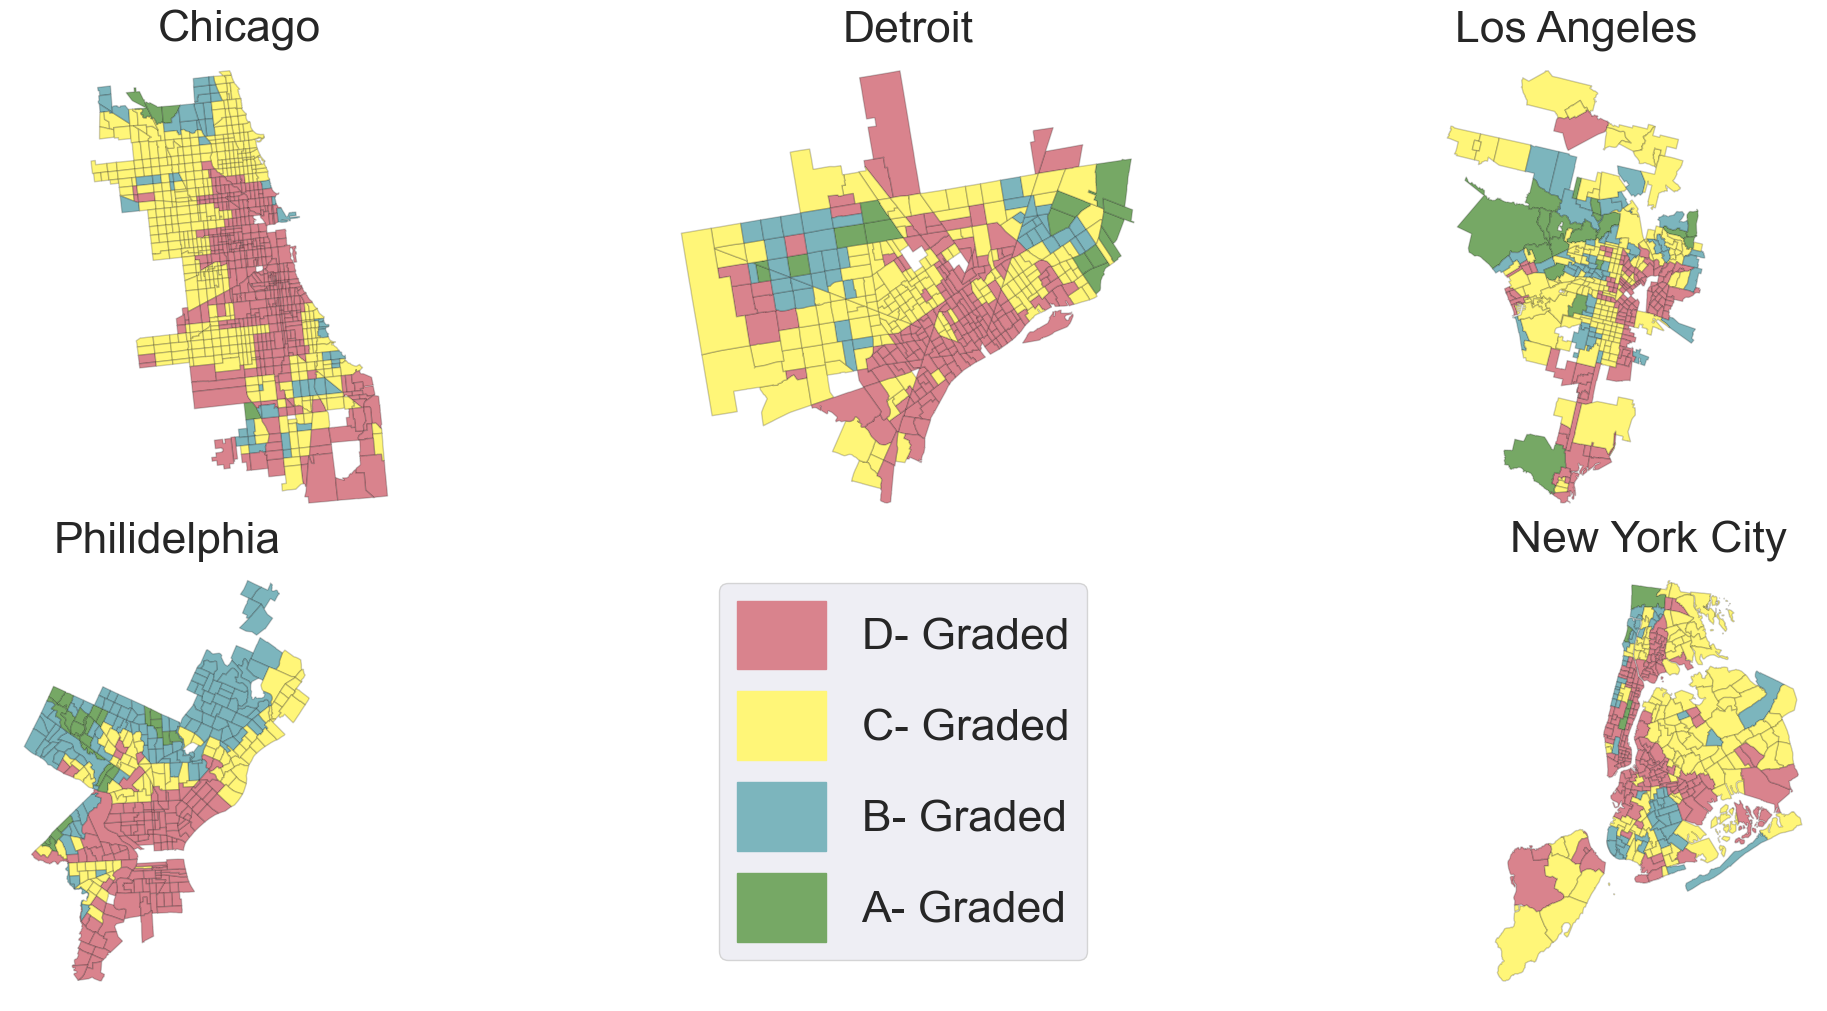

In [ ]:
import matplotlib.colors as colors 
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def plot_city_grade(gdf: gpd.GeoDataFrame, state: str, ax: Axis, title: str=""):
    '''
    Plot one of our cities as a choropleth. The easiest way to do this, 
    amusingly, is to filter by the state.
    '''
    # best '#76a865'
    # still desirable '#7cb5bd'
    # definitely declining: #ffff00
    # hazardous: #d9838d
    
    cmap = colors.ListedColormap(['#d9838d', '#FFF678','#7cb5bd', '#76a865'])

    remap = {
        'D':0, 'C':1,
        'B':2, 'A':3
    }

    gdf_to_plot = gdf.copy()
    gdf_to_plot['grade'] = gdf_to_plot.grade.apply(lambda x: remap[x])

    # very simply plot.. for now
    gdf_to_plot[gdf_to_plot.STATE == state].plot('grade', ax=ax, cmap=cmap, 
                                                 edgecolor=(0, 0, 0, .2))

    ax.set_axis_off()
    ax.set_title(title, fontdict={'fontsize':32})

def plot_grade_grid(gdf: gpd.GeoDataFrame, states: list[str], titles: list[str],
                    fig_title: str=None):
    '''
    Plot the entire grid of choropleths, with names. Returns the subplot objects.
    '''
    fig = plt.figure(layout='constrained', figsize=(20, 10))
    gs1 = GridSpec(2, 3, figure=fig)
    gs2 = GridSpec(2, 2, figure=fig, hspace=.3, wspace=.3)
    axes = [fig.add_subplot(gs1[0, 0]), fig.add_subplot(gs1[0, 1]),
        fig.add_subplot(gs1[0, 2]), fig.add_subplot(gs2[1, 0]),
        fig.add_subplot(gs2[1, 1])]

    # fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    #axes_but_nice = list(axes[0]) + list(axes[1])
    for i, state in enumerate(states):
        plot_city_grade(gdf, state, axes[i], titles[i])
    
    if fig_title: fig.suptitle(fig_title)
    return fig, axes

STATES = ["Illinois", "Michigan", "California", "Pennsylvania", "New York"]
TITLES = ["Chicago", "Detroit", "Los Angeles", "Philidelphia", "New York City"]
fig, axes = plot_grade_grid(data, STATES, TITLES)

# Colors for legend
RED, YELLOW, BLUE, GREEN = '#d9838d', '#FFF678','#7cb5bd', '#76a865'

# Make patches
red_patch = mpatches.Patch(color=RED, label='D- Graded')
yellow_patch = mpatches.Patch(color=YELLOW, label='C- Graded')
blue_patch = mpatches.Patch(color=BLUE, label='B- Graded')
green_patch = mpatches.Patch(color=GREEN, label='A- Graded')

# Thank you chatgpt lol
axes[4].legend(handles=[red_patch, yellow_patch, blue_patch, green_patch],
    prop={'size': 32},          # sets the font size for legend text
    handlelength=2,             # increases the length of the legend handles
    handleheight=2,             # increases the height of the legend handles
    markerscale=2)              # scales marker size (if applicable))s
axes[4].get_legend().set_bbox_to_anchor((-1.1, 1))

In [13]:
def plot_city(gdf: gpd.GeoDataFrame, state: str, ax: Axis, 
                         variable: str, title: str=""):
    '''
    Plot one of our cities as a choropleth. The easiest way to do this, 
    amusingly, is to filter by the state.
    '''
    # very simply plot.. for now
    gdf[gdf.STATE == state].plot(variable, ax=ax,
                                 scheme='FisherJenks')
    ax.set_axis_off()
    ax.set_title(title, fontdict={'fontsize':32})

def plot_choropleth_grid(gdf: gpd.GeoDataFrame, states: list[str], 
                           variable: str, titles: list[str]):
    '''
    Plot the entire grid of choropleths, with names. Returns the subplot objects.
    '''
    fig = plt.figure(layout='constrained', figsize=(20, 10))
    gs1 = GridSpec(2, 3, figure=fig)
    gs2 = GridSpec(2, 2, figure=fig, hspace=.3, wspace=.3)
    axes = [fig.add_subplot(gs1[0, 0]), fig.add_subplot(gs1[0, 1]),
        fig.add_subplot(gs1[0, 2]), fig.add_subplot(gs2[1, 0]),
        fig.add_subplot(gs2[1, 1])]

    # fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    #axes_but_nice = list(axes[0]) + list(axes[1])
    for i, state in enumerate(states):
        plot_city(gdf, state, axes[i], variable, titles[i])

    return fig, axes

## Corplot

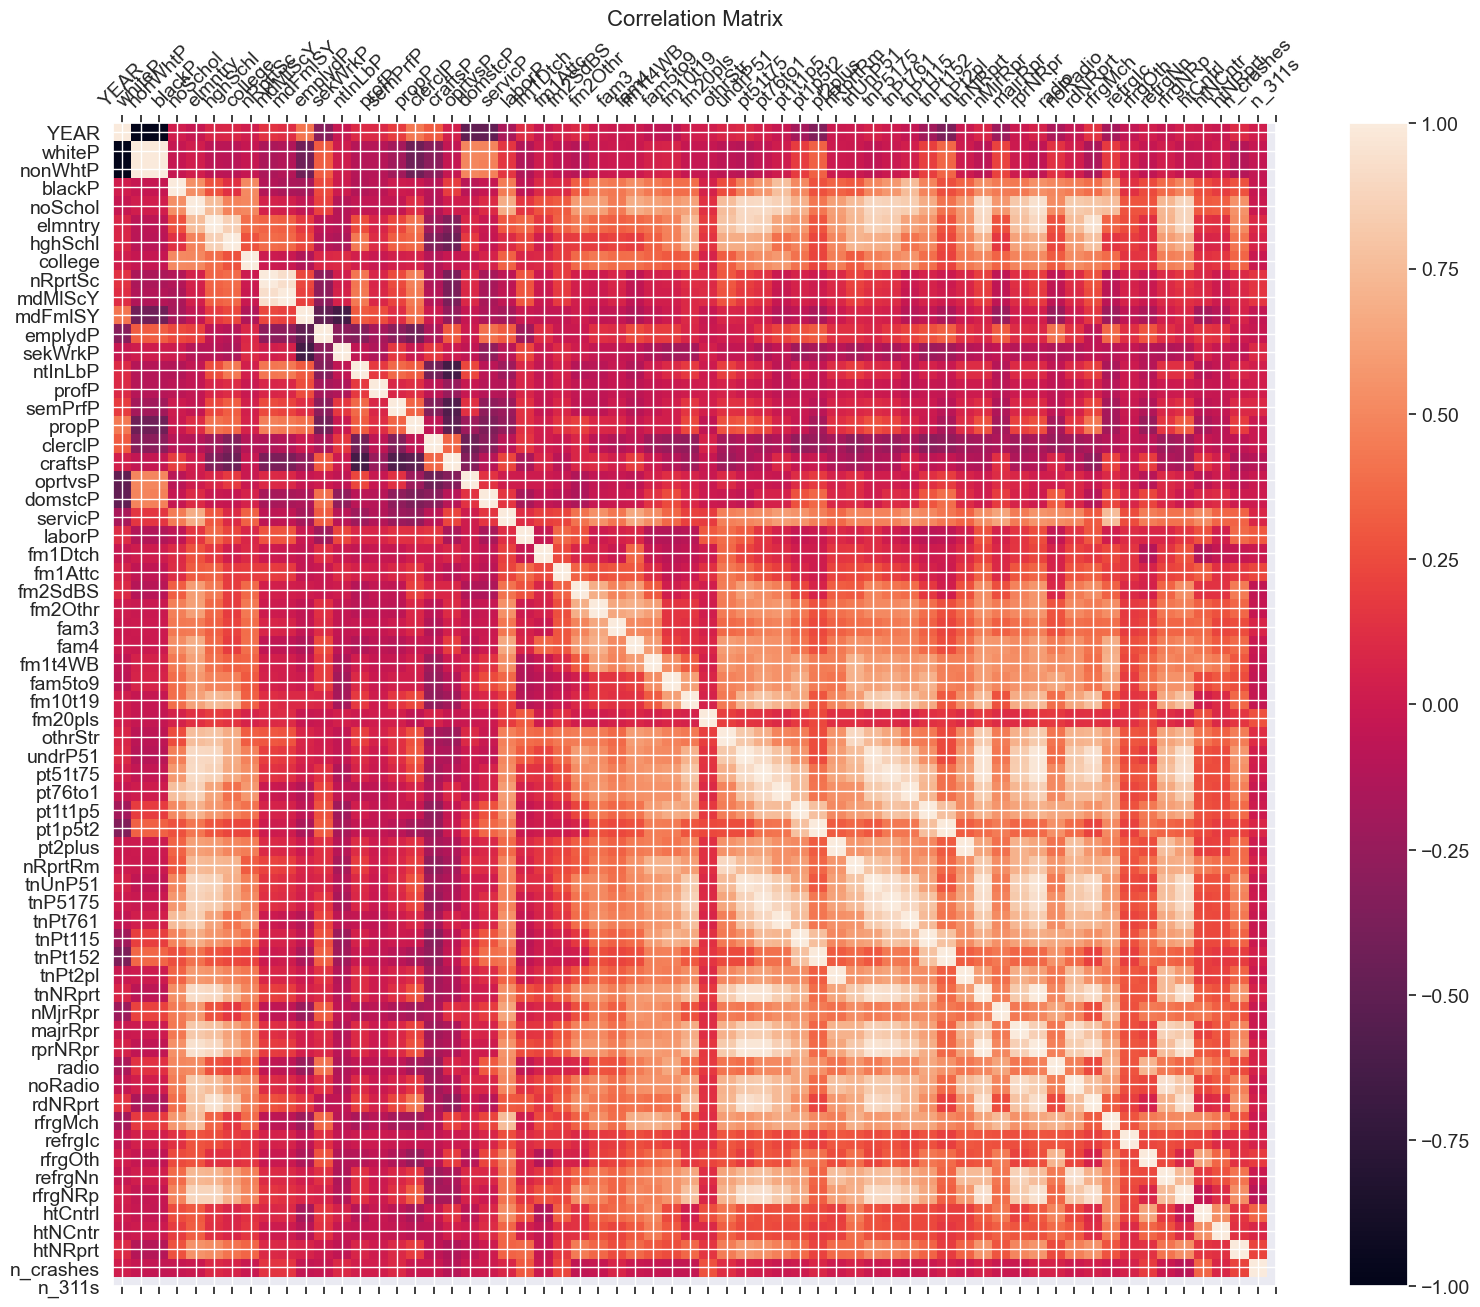

In [14]:
import seaborn as sns

non_numeric = ['GISJOIN', 'YEAR', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'TRACTA', 'geometry', 'grade', 'AREANAM']

corr = data\
    .drop(columns=non_numeric)\
    .corr()

f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [31]:
data.columns # 8 irrelevant, 1 geometry, 2 outcome, 2 treatment indicators

Index(['GISJOIN', 'YEAR', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'TRACTA',
       'AREANAM', 'whiteP', 'nonWhtP', 'blackP', 'noSchol', 'elmntry',
       'hghSchl', 'college', 'nRprtSc', 'mdMlScY', 'mdFmlSY', 'emplydP',
       'sekWrkP', 'ntInLbP', 'profP', 'semPrfP', 'propP', 'clerclP', 'craftsP',
       'oprtvsP', 'domstcP', 'servicP', 'laborP', 'fm1Dtch', 'fm1Attc',
       'fm2SdBS', 'fm2Othr', 'fam3', 'fam4', 'fm1t4WB', 'fam5to9', 'fm10t19',
       'fm20pls', 'othrStr', 'undrP51', 'pt51t75', 'pt76to1', 'pt1t1p5',
       'pt1p5t2', 'pt2plus', 'nRprtRm', 'tnUnP51', 'tnP5175', 'tnPt761',
       'tnPt115', 'tnPt152', 'tnPt2pl', 'tnNRprt', 'nMjrRpr', 'majrRpr',
       'rprNRpr', 'radio', 'noRadio', 'rdNRprt', 'rfrgMch', 'refrgIc',
       'rfrgOth', 'refrgNn', 'rfrgNRp', 'htCntrl', 'htNCntr', 'htNRprt',
       'grade', 'n_crashes', 'n_311s', 'geometry'],
      dtype='object')

In [33]:
data.shape[0] # total number of relevant features

2407

### A few additional tidbits for the results section

In [3]:
import pandas as pd
import geopandas as gpd
from propensity_helpers import *

Read in data and clean it up again

In [16]:
# Split df by cities -- thankfully we can just split on state.
# compare non-black AB to black CD; requires dropping some rows
#mask = df.treatment_.isin(['A', 'B', 'C_black', 'D_black'])
#df_rel = df.copy()[mask].reset_index(drop=True)
data = gpd.read_file('../../data/shapes/census_final_fixed.shp')

# Subset down to cities
chicago = data.copy()[data.STATE == 'Illinois']
newyork = data.copy()[data.STATE == 'New York']
philidelphia = data.copy()[data.STATE == 'Pennsylvania']
losangeles = data.copy()[data.STATE == 'California']
detroit = data.copy()[data.STATE == 'Michigan']

# Ensure boundaries are right
chicago = enforce_administrative_boundaries(chicago, "Chicago, Illinois")
newyork = enforce_administrative_boundaries(newyork, "New York, New York")
philidelphia = enforce_administrative_boundaries(philidelphia, "Philadelphia, Pennsylvania")
losangeles = enforce_administrative_boundaries(losangeles, 'Los Angeles, California')
detroit = enforce_administrative_boundaries(detroit, 'Detroit, Michigan')

data = pd.concat([chicago, newyork, philidelphia, losangeles, detroit], axis=0, ignore_index=True)

In [17]:
data[['grade']].groupby('grade').value_counts()

grade
A      67
B     309
C     967
D    1059
Name: count, dtype: int64

In [30]:
data[['grade', 'n_crashes', 'n_311s']].groupby('grade').mean()

,n_crashes,n_311s
grade,,
A,532.796875,1005.677966
B,681.519737,1253.763333
C,733.511530,1572.928723
D,579.738713,1343.998043


In [31]:
np.sqrt(data[['grade', 'n_crashes', 'n_311s']].groupby('grade').var())

,n_crashes,n_311s
grade,,
A,901.838232,1749.606256
B,959.587136,4743.980298
C,983.622898,3460.124454
D,860.590961,3160.260403


In [37]:
data[['nyn', 'n_crashes', 'n_311s']].groupby('nyn').mean()

,n_crashes,n_311s
nyn,,
False,700.586040,1456.431690
True,579.487991,1353.440622


In [33]:
np.sqrt(data[['nyn', 'n_crashes', 'n_311s']].groupby('nyn').var())

,n_crashes,n_311s
nyn,,
False,891.478767,3936.270587
True,979.604137,2666.642956


In [28]:
data['nyn'].value_counts()

nyn
False    1471
True      931
Name: count, dtype: int64

In [44]:
data[['nyn', 'blackP']].groupby('nyn').mean()

,blackP
nyn,
False,0.847941
True,18.630140


In [56]:
(data[['nyn', 'blackP']][data.nyn] == 0).sum()

nyn         0
blackP    145
dtype: int64

In [57]:
data[['nyn', 'blackP']][data.nyn].median()

nyn       1.000
blackP    1.635
dtype: float64

In [39]:
1471 / 2401

0.6126613910870471

In [40]:
931 / 2401

0.3877551020408163

In [11]:
import numpy as np

arr = np.array([67, 311, 970, 1059])
100 * arr.T / arr.sum() 

array([ 2.78354799, 12.92064811, 40.29912754, 43.99667636])

## LaTeX Tables

In [1]:
import geopandas as gpd
import pandas as pd

In [3]:
data = gpd.read_file('../../data/shapes/census_final_fixed.shp')
data.head()

,GISJOIN,YEAR,STATE,STATEA,COUNTY,COUNTYA,TRACTA,AREANAM,whiteP,nonWhtP,...,rfrgNRp,htCntrl,htNCntr,htNRprt,grade,n_crashes,n_311s,nyn,treatment_,geometry
0,G06003700001,1940.0,California,06,Los Angeles,037,0001,STCTY-06037 TRACT- 0001 IN LOS ANGELES CA,94.54,5.46,...,4.0,82.0,784.0,2.0,C,3053.0,57413.0,False,C,"POLYGON ((-2035356.685 -112082.717, -2034986.1..."
1,G06003700004,1940.0,California,06,Los Angeles,037,0004,STCTY-06037 TRACT- 0004 IN LOS ANGELES CA,95.46,4.54,...,15.0,62.0,1844.0,5.0,D,4293.0,55951.0,False,D,"POLYGON ((-2028287.304 -119059.61, -2028257.85..."
2,G06003700006,1940.0,California,06,Los Angeles,037,0006,STCTY-06037 TRACT- 0006 IN LOS ANGELES CA,91.32,8.68,...,3.0,22.0,239.0,1.0,C,250.0,1233.0,False,C,"POLYGON ((-2023379.775 -124421.28, -2023454.92..."
3,G06003700007,1940.0,California,06,Los Angeles,037,0007,STCTY-06037 TRACT- 0007 IN LOS ANGELES CA,98.67,1.33,...,7.0,18.0,867.0,2.0,C,502.0,3929.0,False,C,"POLYGON ((-2017251.958 -121538.423, -2017259.9..."
4,G06003700012,1940.0,California,06,Los Angeles,037,0012,STCTY-06037 TRACT- 0012 IN LOS ANGELES CA,98.85,1.15,...,1.0,1.0,207.0,0.0,C,96.0,448.0,False,C,"POLYGON ((-2016412.468 -126301.385, -2016466.5..."


In [11]:
TO_DROP = ['GISJOIN', 'YEAR', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'TRACTA', 'AREANAM', 'grade', 'nyn', 'treatment_', 'geometry']

data_rel = data.drop(columns=TO_DROP)

summary = data_rel.describe().T.reset_index().rename(columns={'index':'Feature'}).drop(columns=['25%', '50%', '75%'])
summary.head() 

,Feature,count,mean,std,min,max
0,whiteP,2596.0,92.126109,20.967493,0.0,100.0
1,nonWhtP,2596.0,7.873891,20.967493,0.0,100.0
2,blackP,2596.0,7.233783,20.611133,0.0,100.0
3,noSchol,2616.0,220.410933,551.266212,0.0,6303.0
4,elmntry,2616.0,2201.102446,2598.897656,0.0,16425.0


In [16]:
from tabulate import tabulate

print(tabulate(summary, tablefmt='latex_raw'))

\begin{tabular}{rlrrrrr}
\hline
  0 & whiteP    & 2596 &   92.1261  &   20.9675  & 0 &   100    \\
  1 & nonWhtP   & 2596 &    7.87389 &   20.9675  & 0 &   100    \\
  2 & blackP    & 2596 &    7.23378 &   20.6111  & 0 &   100    \\
  3 & noSchol   & 2616 &  220.411   &  551.266   & 0 &  6303    \\
  4 & elmntry   & 2616 & 2201.1     & 2598.9     & 0 & 16425    \\
  5 & hghSchl   & 2616 & 1256.46    & 1358.38    & 0 & 11017    \\
  6 & college   & 2616 &  427.3     &  698.249   & 0 &  8551    \\
  7 & nRprtSc   & 2616 &   54.6992  &  169.692   & 0 &  2672    \\
  8 & mdMlScY   & 2616 &    8.44343 &    2.75007 & 0 &    16    \\
  9 & mdFmlSY   & 2616 &    8.37798 &    2.77148 & 0 &    13    \\
 10 & emplydP   & 2596 &   46.7517  &    7.66052 & 0 &   100    \\
 11 & sekWrkP   & 2596 &    6.85503 &    4.463   & 0 &   100    \\
 12 & ntInLbP   & 2596 &   44.3834  &    6.34245 & 0 &    92.1  \\
 13 & profP     & 2595 &    6.48681 &    6.32419 & 0 &    76.33 \\
 14 & semPrfP   & 2595 &    1.

## Let's Map Two Things!

In [17]:
import pandas as pd
import geopandas as gpd

In [24]:
# Split df by cities -- thankfully we can just split on state.
# compare non-black AB to black CD; requires dropping some rows
#mask = df.treatment_.isin(['A', 'B', 'C_black', 'D_black'])
#df_rel = df.copy()[mask].reset_index(drop=True)

df_rel = gpd.read_file('../../data/shapes/census_final_fixed.shp')

regrade_mapper = dict(A=0, B=0, C=0, D=0, B_black=1, C_black=1, D_black=1)

# Fix df.grade if needed
if not df_rel.treatment_[0] in [0, 1]:
     df_rel['treatment_'] = df_rel.treatment_.apply(lambda x: regrade_mapper[x])

df_rel = df_rel.drop(columns=['grade', 'nyn'])

# Subset down to cities
chicago = df_rel.copy()[df_rel.STATE == 'Illinois']
newyork = df_rel.copy()[df_rel.STATE == 'New York']
philidelphia = df_rel.copy()[df_rel.STATE == 'Pennsylvania']
losangeles = df_rel.copy()[df_rel.STATE == 'California']
detroit = df_rel.copy()[df_rel.STATE == 'Michigan']

In [25]:
# Ensure boundaries are right
chicago = enforce_administrative_boundaries(chicago, "Chicago, Illinois")
newyork = enforce_administrative_boundaries(newyork, "New York, New York")
philidelphia = enforce_administrative_boundaries(philidelphia, "Philadelphia, Pennsylvania")
losangeles = enforce_administrative_boundaries(losangeles, 'Los Angeles, California')
detroit = enforce_administrative_boundaries(detroit, 'Detroit, Michigan')

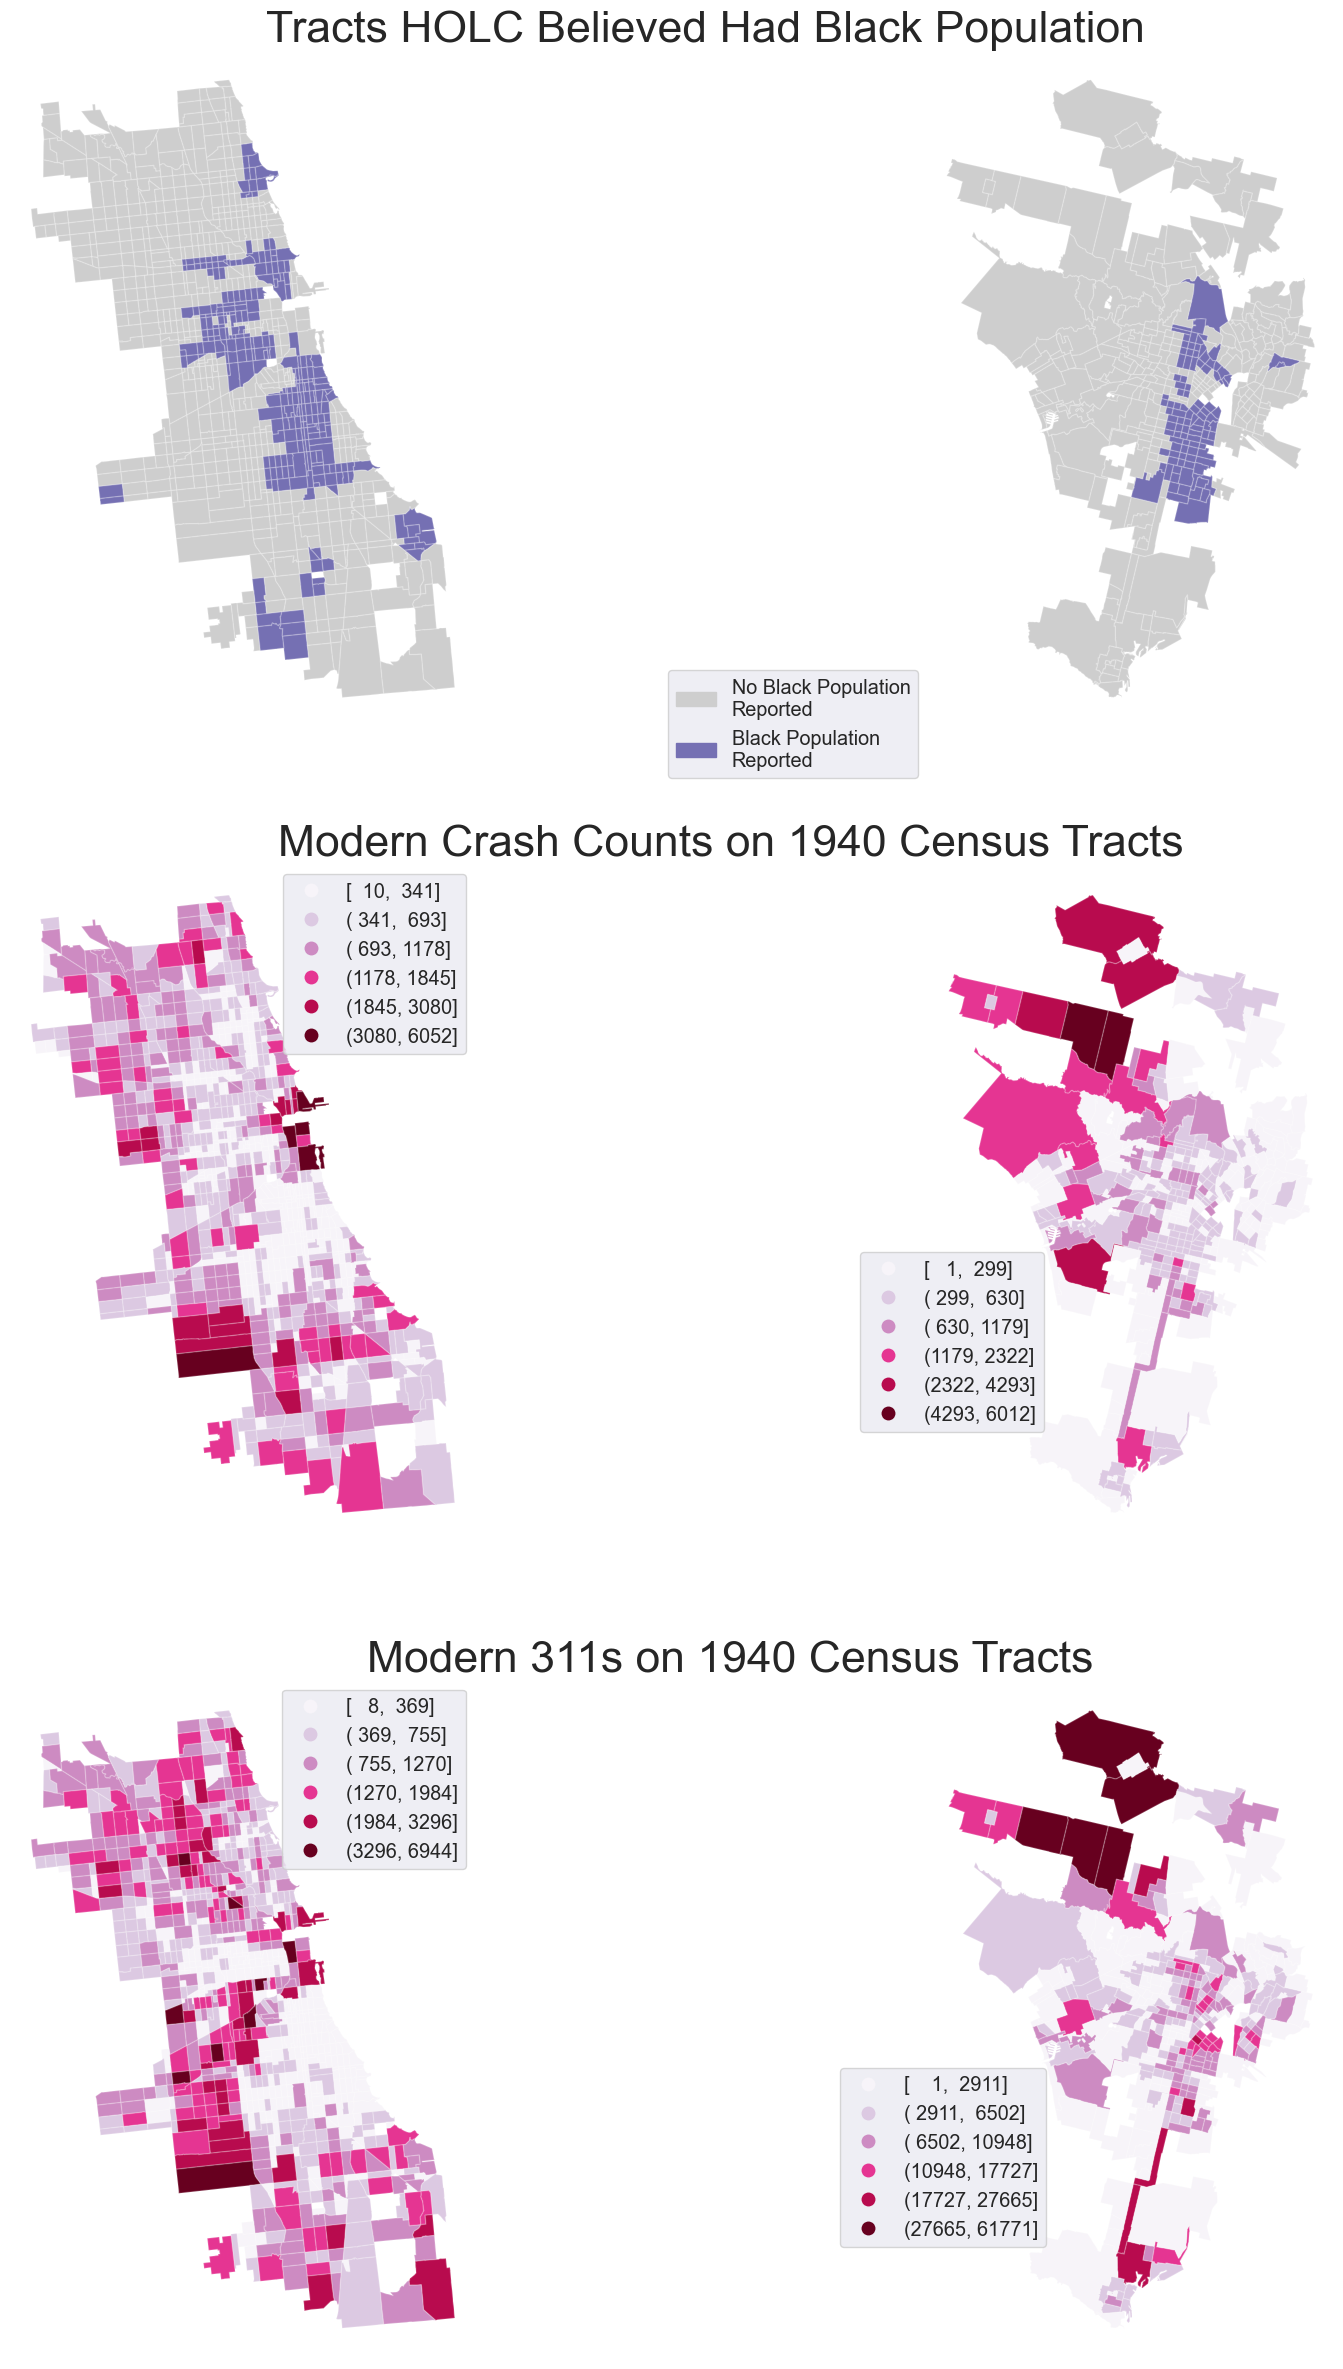

In [ ]:
import matplotlib.colors as colors 
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

EMPTY_COLOR = '#cecece'
FILLED_COLOR = '#7570b3'

#fig, ax = plt.subplots(2, 2)
fig, axes = plt.subplots(3, 2, figsize=(21, 30))
axes = axes.reshape(-1)

def plot_race_treatment(data, ax): 
    treatment_cmap = colors.ListedColormap([EMPTY_COLOR, FILLED_COLOR])
    data.plot("treatment_", ax=ax, cmap=treatment_cmap,
                edgecolor=(1,1,1,.2))
    ax.set_axis_off()

def plot_city(gdf: gpd.GeoDataFrame, state: str, ax: Axis, 
                         variable: str, legend: bool=False,
                         legend_kwds : dict[str]=None):
    '''
    Plot one of our cities as a choropleth. The easiest way to do this, 
    amusingly, is to filter by the state.
    '''
    if not legend_kwds:
        legend_kwds = dict(
            fmt='{:.0f}', interval=True,
            loc='lower left'
        )


    gdf[gdf.STATE == state].plot(variable, ax=ax,
                                 scheme='FisherJenks', k=6, edgecolor=(1,1,1,0.2), 
                                 legend=legend, legend_kwds=legend_kwds, cmap='PuRd')
    ax.set_axis_off()

chicago_legend_kwds = dict(
    fmt='{:.0f}', interval=True,
    loc='upper right'
)

# Set up title for top half of plot
axes[1].set_title('Tracts HOLC Believed Had Black Population', fontsize=32)
axes[1].title.set_position((-.55, 0.))

# Set up legend for race
empty_patch = mpatches.Patch(color=EMPTY_COLOR, label='No Black Population\nReported')
filled_patch = mpatches.Patch(color=FILLED_COLOR, label='Black Population\nReported')

axes[1].legend(handles=[empty_patch, filled_patch])
axes[1].get_legend().set_bbox_to_anchor((0., .1))

# Set up title for crashes
axes[3].set_title('Modern Crash Counts on 1940 Census Tracts', fontsize=32)
axes[3].title.set_position((-.5, 0.))

# Set up title for 311s
axes[5].set_title('Modern 311s on 1940 Census Tracts', fontsize=32)
axes[5].title.set_position((-.5, 0.))

# Plot Race Basemaps
plot_race_treatment(chicago, axes[0], 'Tracts HOLC Believed Had\nBlack Population in Chicago')
plot_race_treatment(losangeles, axes[1], 'Tracts HOLC Believed Had\nBlack Population in Los Angeles')

# Plot crash basemaps
plot_city(chicago, 'Illinois', axes[2], 'n_crashes', 
          'Crashes in Chicago', legend=True, legend_kwds=chicago_legend_kwds)
plot_city(losangeles, 'California', axes[3], 'n_crashes', 
          'Total Crashes in LA', legend=True)

# Plot 311 basemaps
plot_city(chicago, 'Illinois', axes[4], 'n_311s', 
          'Crashes in Chicago', legend=True, legend_kwds=chicago_legend_kwds)
plot_city(losangeles, 'California', axes[5], 'n_311s', 
          'Total Crashes in LA', legend=True)


# Fix LA legends for crashes and 
leg_crash, leg_311 = axes[3].get_legend(), axes[5].get_legend()
leg_crash.set_bbox_to_anchor((-.2, .15, 0.2, 0.2))
leg_311.set_bbox_to_anchor((-.25, .15, 0.2, 0.2))

plt.savefig('../../figures/la_chicago_maps.svg')

<Axes: >

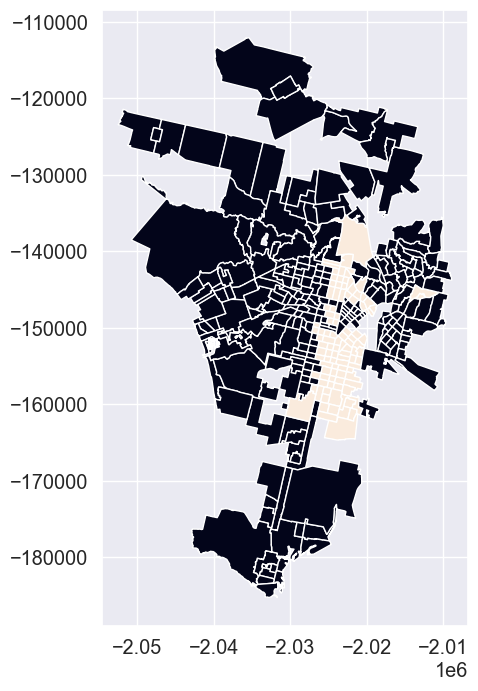

In [27]:
losangeles.plot('treatment_')